In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('wine-clustering.csv')

# Display the first few rows of the dataset
print(data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [2]:
# Check for missing values
print(data.isnull().sum())

# Normalizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


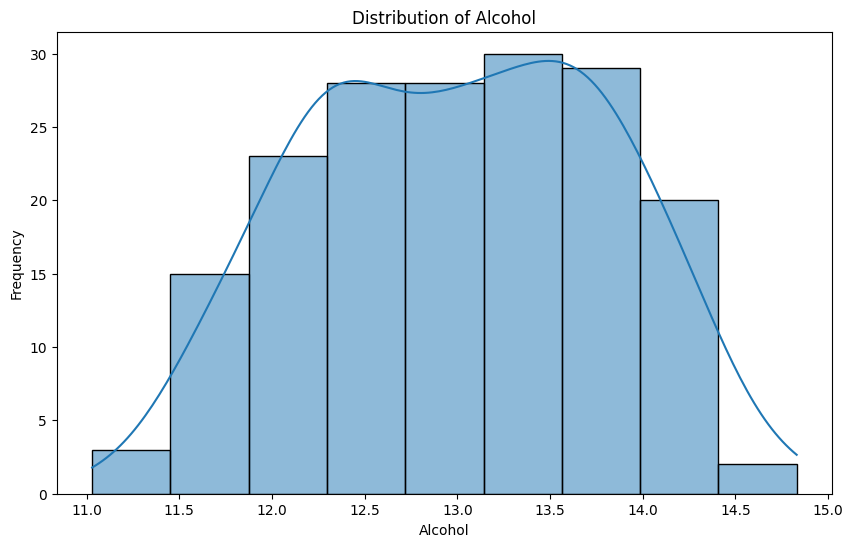

In [3]:
# Histogram for 'Alcohol'
plt.figure(figsize=(10, 6))
sns.histplot(data['Alcohol'], kde=True)
plt.title('Distribution of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

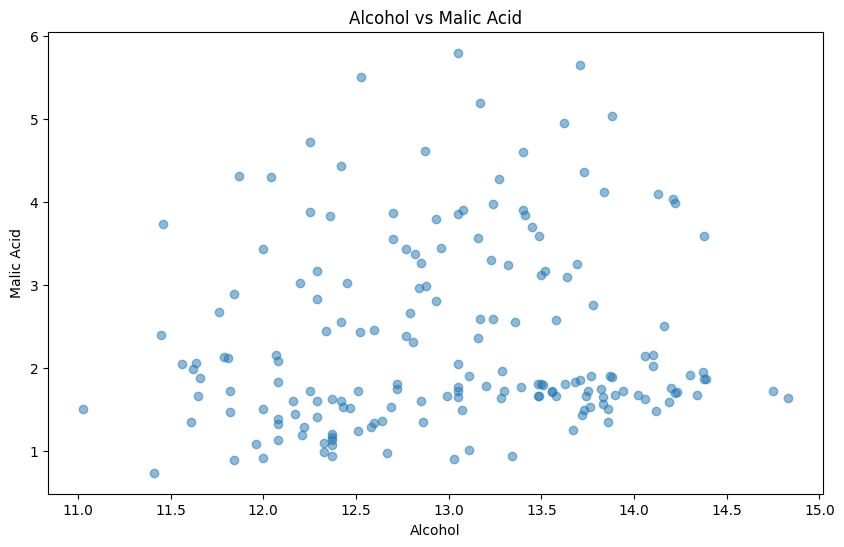

In [4]:
# Scatter plot for 'Alcohol' vs 'Malic_Acid'
plt.figure(figsize=(10, 6))
plt.scatter(data['Alcohol'], data['Malic_Acid'], alpha=0.5)
plt.title('Alcohol vs Malic Acid')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()

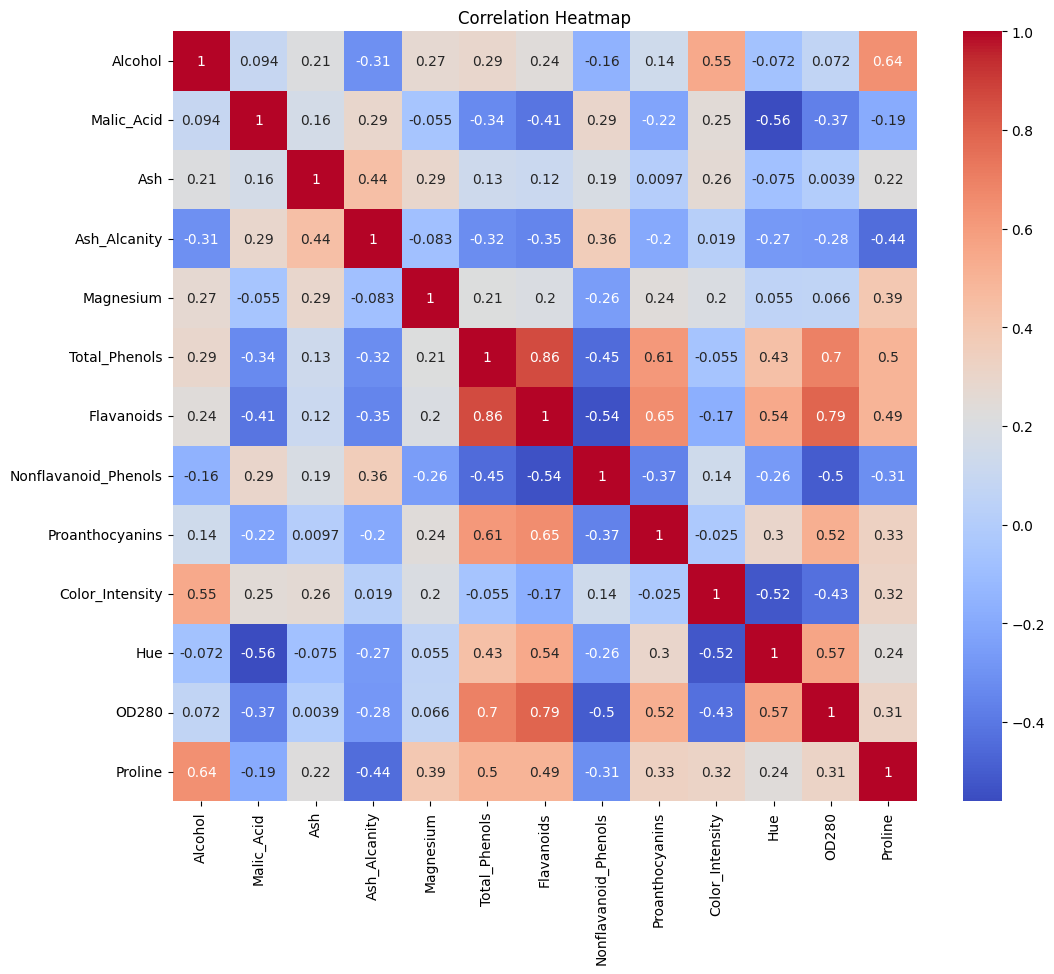

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

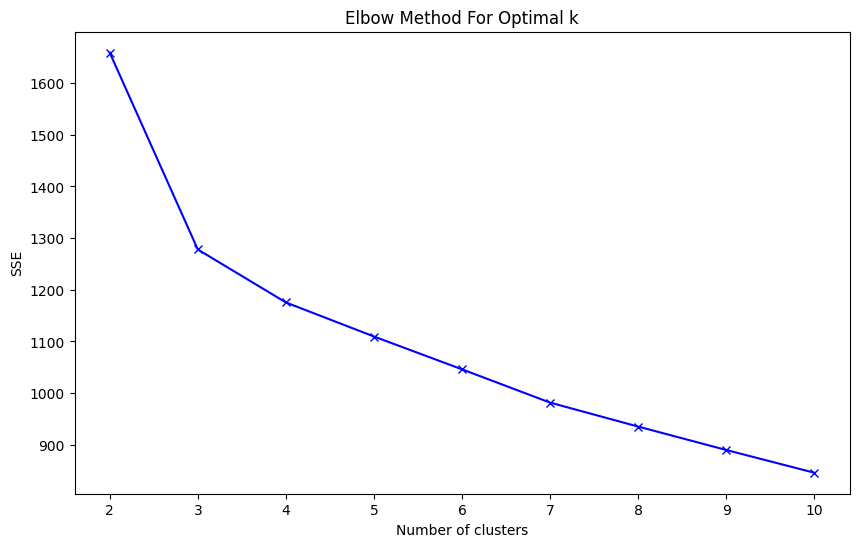

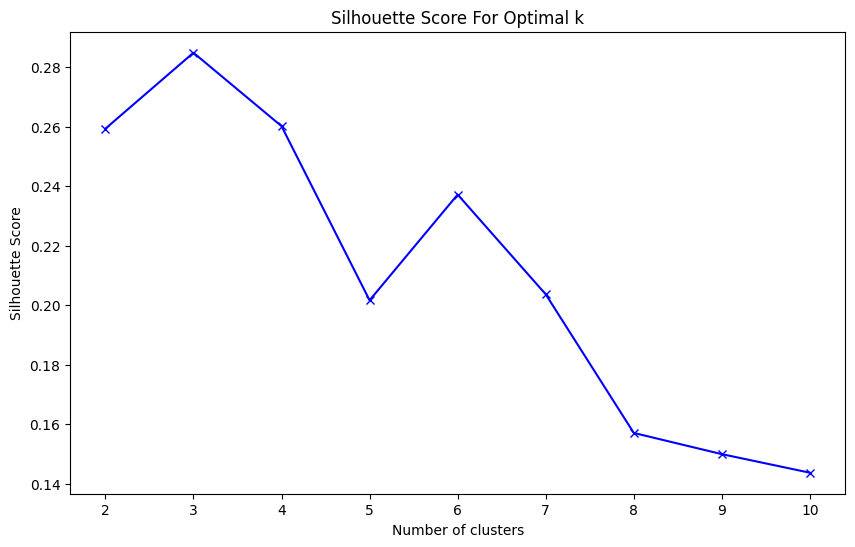

In [6]:
# Elbow Method to determine the optimal number of clusters
sse = []
silhouette = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_data, kmeans.labels_))

# Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Plot
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

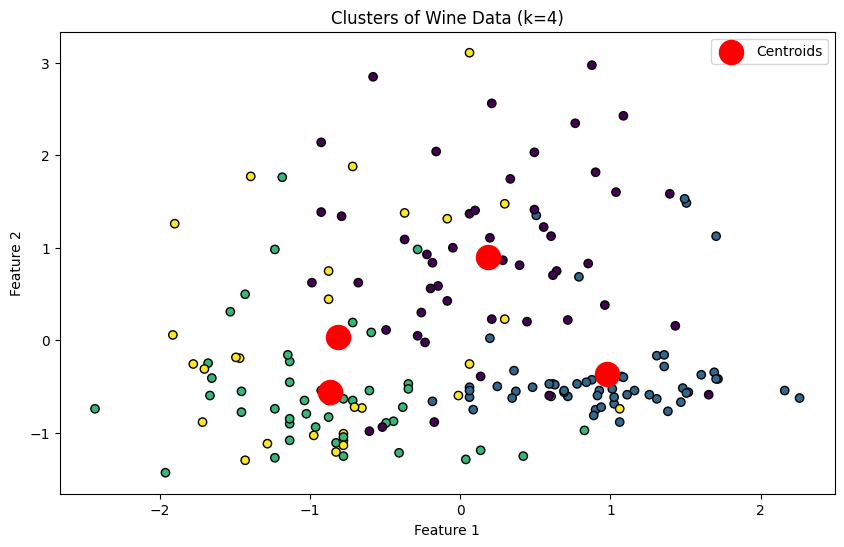

In [7]:
# Optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1],
            c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=300, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Clusters of Wine Data (k={optimal_k})')
plt.legend()
plt.show()

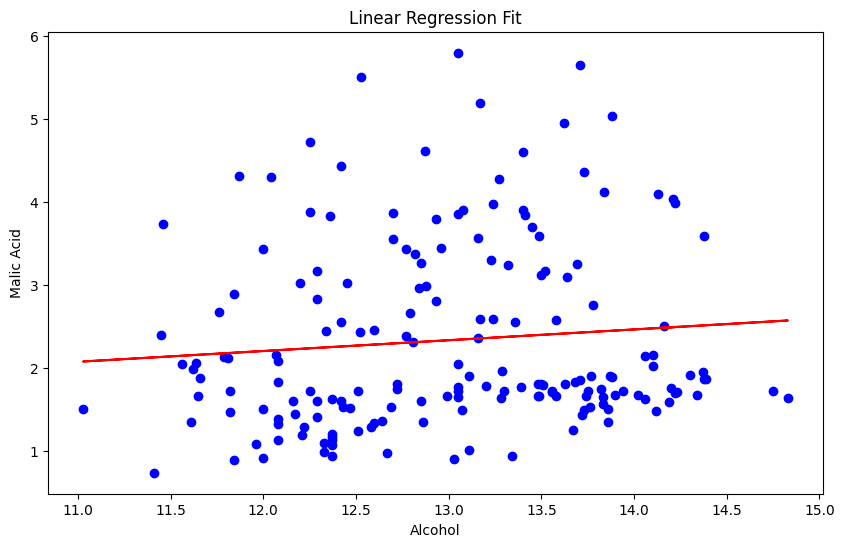

In [8]:
# Using 'Alcohol' to predict 'Malic_Acid'
X = data['Alcohol'].values.reshape(-1, 1)
y = data['Malic_Acid'].values

model = LinearRegression()
model.fit(X, y)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Linear Regression Fit')
plt.show()

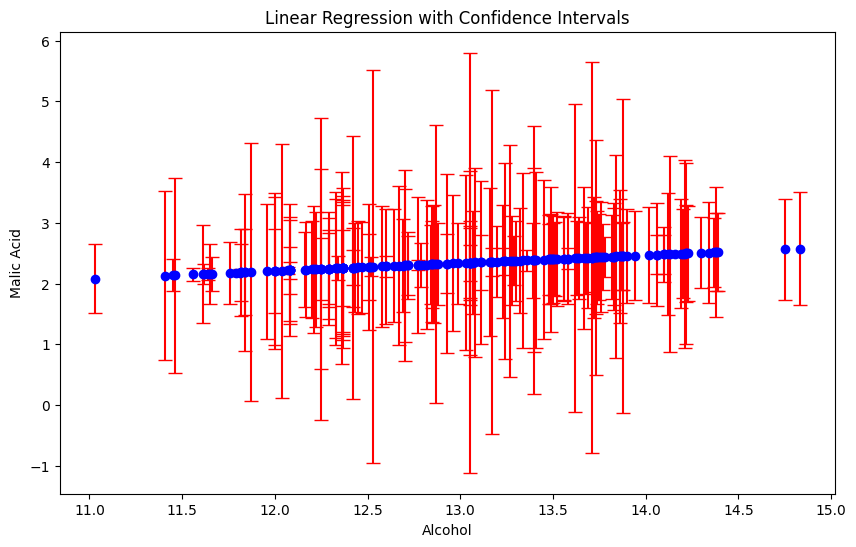

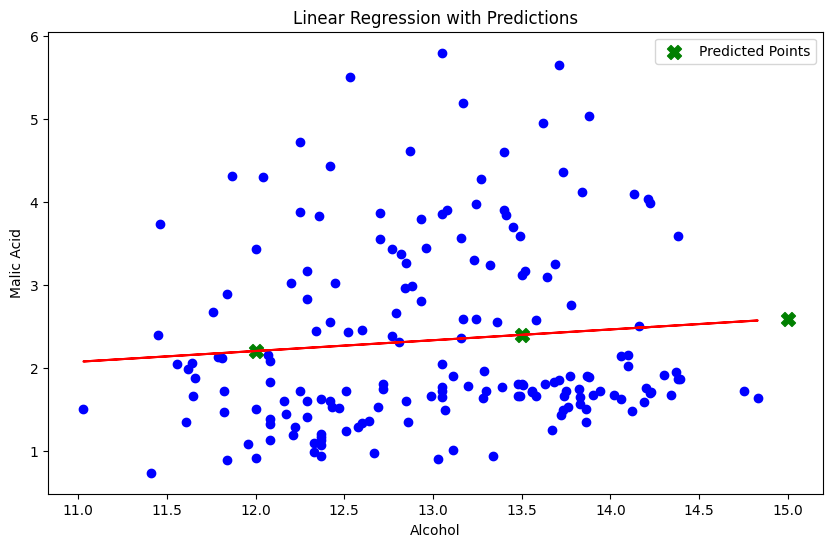

In [9]:
# Predictions with confidence intervals
preds = model.predict(X)
errors = y - preds

# Plotting with absolute value of errors
plt.figure(figsize=(10, 6))
plt.errorbar(X.flatten(), preds, yerr=np.abs(errors), fmt='o', color='blue', ecolor='red', capsize=5)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Linear Regression with Confidence Intervals')
plt.show()

# Make predictions for new data
new_alcohol = np.array([[12], [13.5], [15]])
predicted_malic_acid = model.predict(new_alcohol)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.scatter(new_alcohol, predicted_malic_acid, color='green', marker='X', s=100, label='Predicted Points')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Linear Regression with Predictions')
plt.legend()
plt.show()
